## Real case example

This notebook demonstrates the applicability of Diagnostic Efficiency to a real case example.

In [1]:
import os
import sys
from pathlib import Path  # OS-independent path handling
os.chdir(Path('../..'))
PATH = os.getcwd()
sys.path.insert(0, PATH)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from de import de
from de import kge
from de import nse
from de import util

import warnings
warnings.filterwarnings('ignore')

### Observed streamflow time series and simulated streamflow time series from CAMELS dataset

In order to demonstrate the applicability, we use simulated streamflow time series which have been derived from Addor et al. (2017). Streamflow time series have been simulated by the coupled Snow-17 and SAC-SMA system for the Minam catchment (gauge_id: 13331500; gauge_name: Minam 160 River near Minam, OR, U.S.). For more details about the modelling procedure we refer to section 3.1 in Newman et al. (2015). In the following, we show the results of the diagnostic evaluation for three model runs with different parameter sets. Simulations were generated with the same input data.

In [2]:
path_cam1 = os.path.join(PATH, Path('examples/13331500_05_model_output.txt'))
path_cam2 = os.path.join(PATH, Path('examples/13331500_48_model_output.txt'))
path_cam3 = os.path.join(PATH, Path('examples/13331500_94_model_output.txt'))
df_cam1 = util.import_camels_obs_sim(path_cam1)
df_cam2 = util.import_camels_obs_sim(path_cam2)
df_cam3 = util.import_camels_obs_sim(path_cam3)

### Plotting simulated streamflow time series and corresponding flow duration curves

Text(0.95, 0.95, '(f; set_id: 94)')

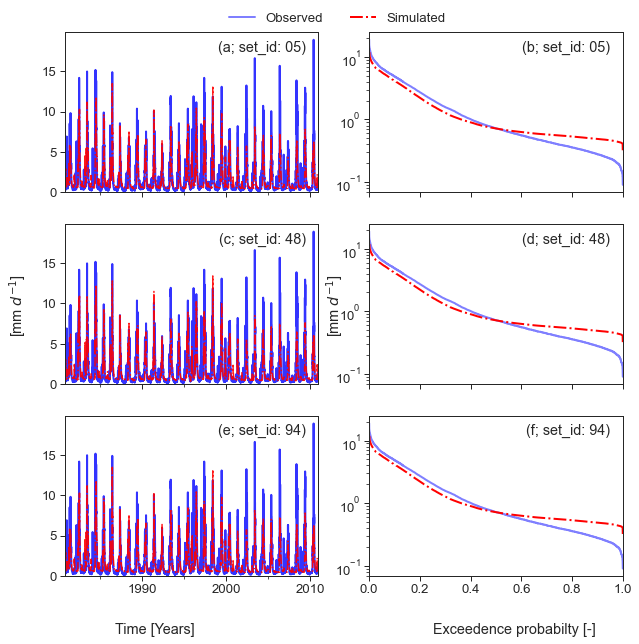

In [3]:
idx = ['05', '48', '94']
fig, axes = plt.subplots(3, 2, figsize=(10, 10), sharex='col')
fig.text(0.06, 0.5, r'[mm $d^{-1}$]', ha='center', va='center',
         rotation='vertical')
fig.text(0.5, 0.5, r'[mm $d^{-1}$]', ha='center', va='center',
         rotation='vertical')
fig.text(0.25, 0.05, 'Time [Years]', ha='center', va='center')
fig.text(0.75, 0.05, 'Exceedence probabilty [-]', ha='center', va='center')

util.plot_obs_sim_ax(df_cam1['Qobs'], df_cam1['Qsim'], axes[0, 0], '')
axes[0, 0].text(.95, .95, '(a; set_id: {})'.format(idx[0]),
                transform=axes[0, 0].transAxes, ha='right', va='top')
# format the ticks
years_10 = mdates.YearLocator(10)
years_5 = mdates.YearLocator(5)
yearsFmt = mdates.DateFormatter('%Y')
axes[0, 0].xaxis.set_major_locator(years_10)
axes[0, 0].xaxis.set_major_formatter(yearsFmt)
axes[0, 0].xaxis.set_minor_locator(years_5)
util.fdc_obs_sim_ax(df_cam1['Qobs'], df_cam1['Qsim'], axes[0, 1], '')
axes[0, 1].text(.95, .95, '(b; set_id: {})'.format(idx[0]),
                transform=axes[0, 1].transAxes, ha='right', va='top')
# legend above plot
axes[0, 1].legend(loc=2, labels=['Observed', 'Simulated'], ncol=2,
                  frameon=False, bbox_to_anchor=(-0.6, 1.2))

util.plot_obs_sim_ax(df_cam2['Qobs'], df_cam2['Qsim'], axes[1, 0], '')
axes[1, 0].text(.95, .95, '(c; set_id: {})'.format(idx[1]),
                transform=axes[1, 0].transAxes, ha='right', va='top')
# format the ticks
years_10 = mdates.YearLocator(10)
years_5 = mdates.YearLocator(5)
yearsFmt = mdates.DateFormatter('%Y')
axes[1, 0].xaxis.set_major_locator(years_10)
axes[1, 0].xaxis.set_major_formatter(yearsFmt)
axes[1, 0].xaxis.set_minor_locator(years_5)
util.fdc_obs_sim_ax(df_cam1['Qobs'], df_cam1['Qsim'], axes[1, 1], '')
axes[1, 1].text(.95, .95, '(d; set_id: {})'.format(idx[1]),
                transform=axes[1, 1].transAxes, ha='right', va='top')

util.plot_obs_sim_ax(df_cam1['Qobs'], df_cam1['Qsim'], axes[2, 0], '')
axes[2, 0].text(.95, .95, '(e; set_id: {})'.format(idx[2]),
                transform=axes[2, 0].transAxes, ha='right', va='top')
# format the ticks
years_10 = mdates.YearLocator(10)
years_5 = mdates.YearLocator(5)
yearsFmt = mdates.DateFormatter('%Y')
axes[2, 0].xaxis.set_major_locator(years_10)
axes[2, 0].xaxis.set_major_formatter(yearsFmt)
axes[2, 0].xaxis.set_minor_locator(years_5)
util.fdc_obs_sim_ax(df_cam1['Qobs'], df_cam1['Qsim'], axes[2, 1], '')
axes[2, 1].text(.95, .95, '(f; set_id: {})'.format(idx[2]),
                transform=axes[2, 1].transAxes, ha='right', va='top')

### Evaluation of model performance

In [4]:
# create dataframe for comparison of DE, KGE and NSE
idx = ['05', '48', '94']
cols = ['brel_mean', 'b_area', 'temp_cor', 'de', 'b_dir', 'b_slope',
        'phi', 'beta', 'alpha', 'kge', 'nse']
df_eff_cam = pd.DataFrame(index=idx, columns=cols, dtype=np.float64)

#### Calculation of DE, KGE and NSE

In [5]:
# make arrays
obs_arr = df_cam1['Qobs'].values
sim_arr = df_cam1['Qsim'].values

# mean relative bias
brel_mean = de.calc_brel_mean(obs_arr, sim_arr)
df_eff_cam.iloc[0, 0] = brel_mean
# residual relative bias
brel_res = de.calc_brel_res(obs_arr, sim_arr)
# area of relative remaing bias
b_area = de.calc_bias_area(brel_res)
df_eff_cam.iloc[0, 1] = b_area
# temporal correlation
temp_cor = de.calc_temp_cor(obs_arr, sim_arr)
df_eff_cam.iloc[0, 2] = temp_cor
# diagnostic efficiency
df_eff_cam.iloc[0, 3] = de.calc_de(obs_arr, sim_arr)
# direction of bias
b_dir = de.calc_bias_dir(brel_res)
df_eff_cam.iloc[0, 4] = b_dir
# slope of bias
b_slope = de.calc_bias_slope(b_area, b_dir)
df_eff_cam.iloc[0, 5] = b_slope
# convert to radians
# (y, x) Trigonometric inverse tangent
df_eff_cam.iloc[0, 6] = np.arctan2(brel_mean, b_slope)

# KGE beta
df_eff_cam.iloc[0, 7] = kge.calc_kge_beta(obs_arr, sim_arr)
# KGE alpha
df_eff_cam.iloc[0, 8] = kge.calc_kge_alpha(obs_arr, sim_arr)
# KGE
df_eff_cam.iloc[0, 9] = kge.calc_kge(obs_arr, sim_arr)

# NSE
df_eff_cam.iloc[0, 10] = nse.calc_nse(obs_arr, sim_arr)

# make arrays
obs_arr = df_cam2['Qobs'].values
sim_arr = df_cam2['Qsim'].values

# mean relative bias
brel_mean = de.calc_brel_mean(obs_arr, sim_arr)
df_eff_cam.iloc[1, 0] = brel_mean
# residual relative bias
brel_res = de.calc_brel_res(obs_arr, sim_arr)
# area of relative remaing bias
b_area = de.calc_bias_area(brel_res)
df_eff_cam.iloc[1, 1] = b_area
# temporal correlation
temp_cor = de.calc_temp_cor(obs_arr, sim_arr)
df_eff_cam.iloc[1, 2] = temp_cor
# diagnostic efficiency
df_eff_cam.iloc[1, 3] = de.calc_de(obs_arr, sim_arr)
# direction of bias
b_dir = de.calc_bias_dir(brel_res)
df_eff_cam.iloc[1, 4] = b_dir
# slope of bias
b_slope = de.calc_bias_slope(b_area, b_dir)
df_eff_cam.iloc[1, 5] = b_slope
# convert to radians
# (y, x) Trigonometric inverse tangent
df_eff_cam.iloc[1, 6] = np.arctan2(brel_mean, b_slope)

# KGE beta
df_eff_cam.iloc[1, 7] = kge.calc_kge_beta(obs_arr, sim_arr)
# KGE alpha
df_eff_cam.iloc[1, 8] = kge.calc_kge_alpha(obs_arr, sim_arr)
# KGE
df_eff_cam.iloc[1, 9] = kge.calc_kge(obs_arr, sim_arr)

# NSE
df_eff_cam.iloc[1, 10] = nse.calc_nse(obs_arr, sim_arr)

# make arrays
obs_arr = df_cam3['Qobs'].values
sim_arr = df_cam3['Qsim'].values

# mean relative bias
brel_mean = de.calc_brel_mean(obs_arr, sim_arr)
df_eff_cam.iloc[2, 0] = brel_mean
# residual relative bias
brel_res = de.calc_brel_res(obs_arr, sim_arr)
# area of relative remaing bias
b_area = de.calc_bias_area(brel_res)
df_eff_cam.iloc[2, 1] = b_area
# temporal correlation
temp_cor = de.calc_temp_cor(obs_arr, sim_arr)
df_eff_cam.iloc[2, 2] = temp_cor
# diagnostic efficiency
df_eff_cam.iloc[2, 3] = de.calc_de(obs_arr, sim_arr)
# direction of bias
b_dir = de.calc_bias_dir(brel_res)
df_eff_cam.iloc[2, 4] = b_dir
# slope of bias
b_slope = de.calc_bias_slope(b_area, b_dir)
df_eff_cam.iloc[2, 5] = b_slope
# convert to radians
# (y, x) Trigonometric inverse tangent
df_eff_cam.iloc[2, 6] = np.arctan2(brel_mean, b_slope)

# KGE beta
df_eff_cam.iloc[2, 7] = kge.calc_kge_beta(obs_arr, sim_arr)
# KGE alpha
df_eff_cam.iloc[2, 8] = kge.calc_kge_alpha(obs_arr, sim_arr)
# KGE
df_eff_cam.iloc[2, 9] = kge.calc_kge(obs_arr, sim_arr)

# NSE
df_eff_cam.iloc[2, 10] = nse.calc_nse(obs_arr, sim_arr)

### Diagnostic polar plot

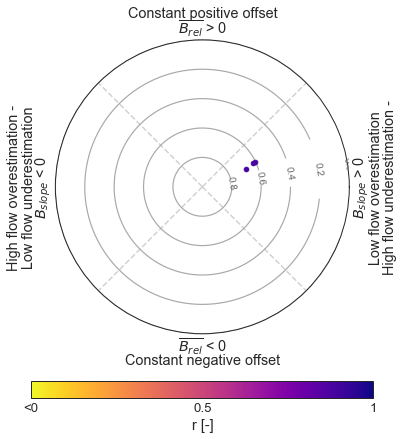

In [6]:
brel_mean_arr = df_eff_cam['brel_mean'].values
b_area_arr = df_eff_cam['b_area'].values
temp_cor_arr = df_eff_cam['temp_cor'].values
b_dir_arr = df_eff_cam['b_dir'].values
de_arr = df_eff_cam['de'].values
phi_arr = df_eff_cam['phi'].values
b_slope_arr = df_eff_cam['b_slope'].values

fig_de = de.diag_polar_plot_multi(brel_mean_arr, b_area_arr,
                                  temp_cor_arr, de_arr, b_dir_arr,
                                  phi_arr)

Simulations realised by parameter set with set_id 94 outperform the other parameter sets. All simulations have in common, that positive dynamic error type (i.e. high flows are underestimated and low flows are overestimated) dominates accompanied by a slight positive constant error. Timing contributes least to the error.

After identifying the error types and its contributions, we can infer hints on how to improve the simulations. From a process- based (perceptual) perspective, the apparent negative dynamic error described by high flow underestimation and low flow overestimation suggest that process realism (e.g. snow melt, infiltration, storage outflow) appears to be deficient. Measures for improvement could start with adjusting the model parameters (e.g. refining the calibration procedure). If necessary, a follow-up measure could be to alter the model structure (e.g. adjusting the model equations). Additionally, there is positive constant error available. Because a constant error may be linked to input data errors, this implies that adjusting the input data (e.g. precipitation correction) might amend the simulations.

### References

Addor, N., Newman, A. J., Mizukami, N., and Clark, M. P.: The CAMELS data set: catchment attributes and meteorology for large-sample studies, in, version 2.0 ed., Boulder, CO: UCAR/NCAR, 2017.

Newman, A. J., Clark, M. P., Sampson, K., Wood, A., Hay, L. E., Bock, A., Viger, R. J., Blodgett, D., Brekke, L., Arnold, J. R., Hopson, T., and Duan, Q.: Development of a large-sample watershed-scale hydrometeorological data set for the contiguous USA: data set characteristics and assessment of regional variability in hydrologic model performance, Hydrol. Earth Syst. Sci., 19, 209-223, 10.5194/hess-19-209-2015, 2015.